In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv(Path("Resources/lending_data.csv"))

# Review the DataFrame
lending_data_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df["loan_status"]

# Separate the X variable, the features
X = lending_data_df.drop(columns=["loan_status"])

In [4]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [9]:
# Generate a confusion matrix for the model
cf_matrix = confusion_matrix(y_test, predictions)
cf_matrix

array([[18673,    86],
       [   32,   593]], dtype=int64)

<Axes: >

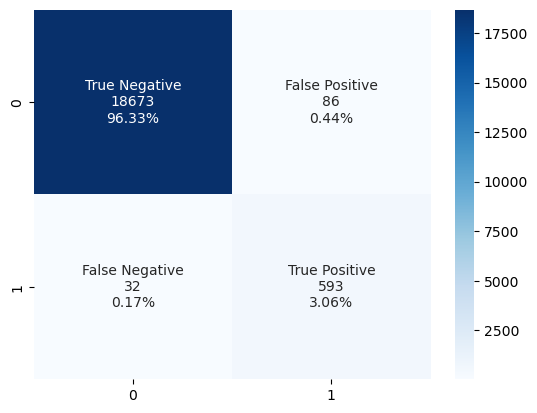

In [10]:
# Generate a confusion matrix for the model
# ALTERNATE: confusion matrix with additional formatting
import seaborn as sns
import numpy as np
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [11]:
# Print the classification report for the model
target_names = ["Health Loan - 0", "High-Risk Loan - 1"]
print(classification_report(y_test, predictions, target_names=target_names))

                    precision    recall  f1-score   support

   Health Loan - 0       1.00      1.00      1.00     18759
High-Risk Loan - 1       0.87      0.95      0.91       625

          accuracy                           0.99     19384
         macro avg       0.94      0.97      0.95     19384
      weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model created in this exercise exhibits a strong overall accruacy of ~99%.  When predicting the '0' label (health loan), the model demonstrates both near perfect precision (~100% of the loans it classified as healthy actually were) and recall (~100% of the loans that were actually healthy were predicted as such by the model).  The model also performed reasonably well when predicting the '1' label (high risk loans), with a strong level of recall (~95% of the loans that were actually high risk were predicted as such by the model).  The model's precision of 87% in regards to the '1' label (~85% of the loans that were classified as high risk actually were) was also decent but showed that the model may have a chance of incorrectly classifying healthy loans as high-risk.

---